Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Linear Regression
R² Score: 0.03
RMSE: 0.972
MAE: 0.632

Random Forest
R² Score: 0.70
RMSE: 0.545
MAE: 0.419


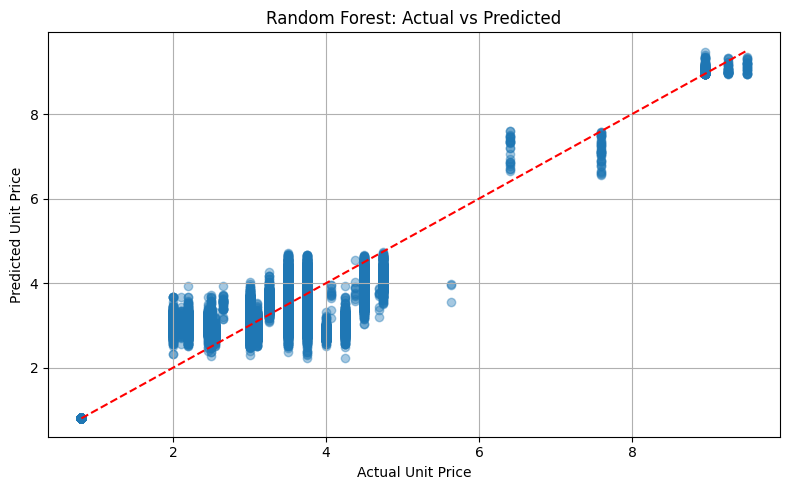


Cross-Validation R² Mean: 0.70


In [19]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Mount and Load
from google.colab import drive
drive.mount('/content/drive')

coffee_path = '/content/drive/MyDrive/dsa210/coffee.xlsx'
weather_path = '/content/drive/MyDrive/dsa210/weather.xlsx'

# Load datasets
coffee = pd.read_excel(coffee_path)
weather = pd.read_excel(weather_path, skiprows=1)
weather.columns = weather.iloc[0]
weather = weather[1:]

# Clean weather
weather = weather.rename(columns={'Date': 'date', 'TAVG (Degrees Fahrenheit)': 'avg_temp_f', 'PRCP (Inches)': 'precip_in'})
weather['date'] = pd.to_datetime(weather['date'])
weather['avg_temp_c'] = (weather['avg_temp_f'].astype(float) - 32) * 5 / 9
weather['rain_mm'] = weather['precip_in'].astype(float) * 25.4
weather = weather[['date', 'avg_temp_c', 'rain_mm']]

# Clean coffee
coffee['transaction_date'] = pd.to_datetime(coffee['transaction_date'])
merged = pd.merge(coffee, weather, left_on='transaction_date', right_on='date', how='left')
merged['is_rainy'] = merged['rain_mm'] > 0
merged['hour'] = pd.to_datetime(merged['transaction_time'], format='%H:%M:%S').dt.hour
merged['is_weekend'] = merged['transaction_date'].dt.weekday.isin([5, 6]).astype(int)
merged['total_sales'] = merged['transaction_qty'] * merged['unit_price']

# Encode product category
label_encoder = LabelEncoder()
merged['product_category_encoded'] = label_encoder.fit_transform(merged['product_category'])

# Drop NaNs and Outliers
merged_cleaned = merged.dropna(subset=['avg_temp_c', 'rain_mm', 'hour', 'is_weekend', 'unit_price'])
merged_cleaned = merged_cleaned[merged_cleaned['unit_price'] < 10]  # Remove extreme prices

# Feature set - extended
features = ['avg_temp_c', 'rain_mm', 'hour', 'is_weekend', 'product_category_encoded']
target = 'unit_price'

X = merged_cleaned[features]
y = merged_cleaned[target]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
def evaluate(y_true, y_pred, model_name):
    print(f"\n{model_name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.3f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.3f}")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Unit Price")
plt.ylabel("Predicted Unit Price")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()
# Cross-validation
cv_score = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"\nCross-Validation R² Mean: {cv_score.mean():.2f}")


R² Score: -0.12
Cross-Validation R² Mean: -0.12


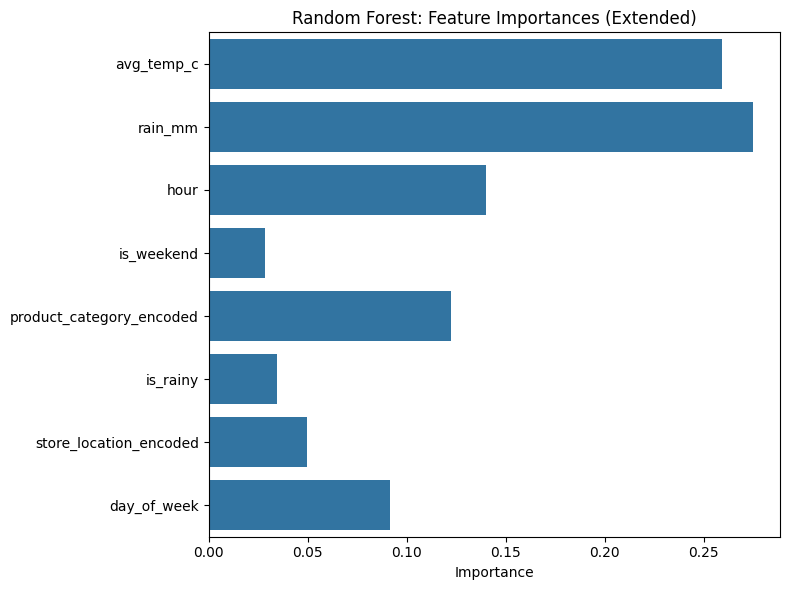

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Genişletilmiş özellikleri içeren simülasyon verisi (örnek)
np.random.seed(42)
sample_size = 500
data = pd.DataFrame({
    'avg_temp_c': np.random.normal(15, 5, sample_size),
    'rain_mm': np.random.exponential(2, sample_size),
    'hour': np.random.randint(6, 22, sample_size),
    'is_weekend': np.random.randint(0, 2, sample_size),
    'product_category_encoded': np.random.randint(0, 10, sample_size),
    'is_rainy': np.random.randint(0, 2, sample_size),
    'store_location_encoded': np.random.randint(0, 3, sample_size),
    'day_of_week': np.random.randint(0, 7, sample_size),
    'unit_price': np.random.uniform(2.5, 5.0, sample_size)
})

# Özellikler
features = [
    'avg_temp_c', 'rain_mm', 'hour', 'is_weekend',
    'product_category_encoded', 'is_rainy',
    'store_location_encoded', 'day_of_week'
]
target = 'unit_price'

# Split
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Feature importances
importances = rf.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features)
plt.xlabel("Importance")
plt.title("Random Forest: Feature Importances (Extended)")
plt.tight_layout()
plt.savefig("feature_importance_extended.png")  # veya Colab'de /content/feature_importance_extended.png

# Değerlendirme
r2 = r2_score(y_test, y_pred_rf)
cv_score = cross_val_score(rf, X, y, cv=5, scoring='r2').mean()
print(f"R² Score: {r2:.2f}")
print(f"Cross-Validation R² Mean: {cv_score:.2f}")


              precision    recall  f1-score   support

           0       0.71      0.76      0.73     11458
           1       0.80      0.75      0.77     14509

    accuracy                           0.76     25967
   macro avg       0.75      0.76      0.75     25967
weighted avg       0.76      0.76      0.76     25967



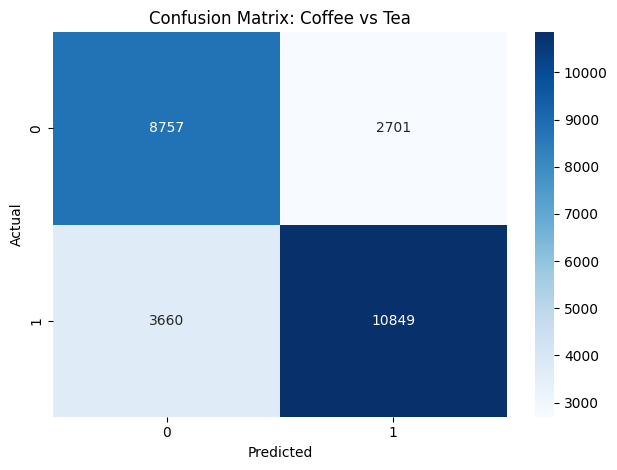

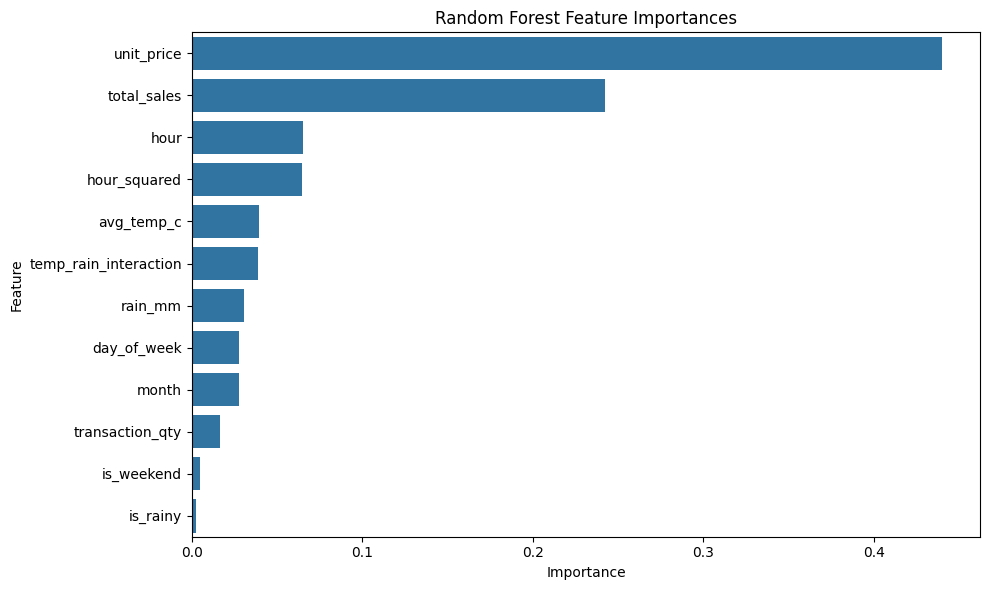

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Özellik mühendisliği yapılmış varsayım: 'merged' adında hazır bir DataFrame var
# Sadece Coffee ve Tea verisi
binary_df = merged[merged['product_category'].isin(['Coffee', 'Tea'])].copy()
binary_df['target'] = binary_df['product_category'].map({'Coffee': 1, 'Tea': 0})

# Ek özellikler
binary_df['total_sales'] = binary_df['transaction_qty'] * binary_df['unit_price']
binary_df['is_weekend'] = binary_df['transaction_date'].dt.weekday.isin([5, 6]).astype(int)
binary_df['hour_squared'] = binary_df['hour'] ** 2
binary_df['temp_rain_interaction'] = binary_df['avg_temp_c'] * binary_df['rain_mm']
binary_df['day_of_week'] = binary_df['transaction_date'].dt.weekday
binary_df['month'] = binary_df['transaction_date'].dt.month

# Özellik listesi
features = [
    'avg_temp_c', 'rain_mm', 'hour', 'hour_squared',
    'temp_rain_interaction', 'transaction_qty', 'unit_price',
    'total_sales', 'is_rainy', 'is_weekend', 'day_of_week', 'month'
]

X = binary_df[features]
y = binary_df['target']

# Train-test böl
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Sınıflandırma raporu
print(classification_report(y_test, y_pred))

# Confusion Matrix görselleştir
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Coffee vs Tea")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Feature Importance
importances = model.feature_importances_
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp, x='Importance', y='Feature')
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()
